In [1]:
# Student Information:
# Name Muhammad Owais Imran
# CWID: 20025554
# HW # 05
# HW Title: Decision Tree (CART)
# Description: Implement CART on Breast Cancer Dataset

## **Library import**

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## **Loading CSV File**

In [3]:
df = pd.read_csv("MuhammadOwais_Imran_HW05_BreastCancerDataset.csv")
print(df.shape)
df.replace("?",np.nan,inplace=True)
# df.dropna(inplace=True)
print(df.shape)

(699, 11)
(699, 11)


## **Extracting Class Column and dropping it from data frame**

In [4]:
target = df["Class"]
df.drop(columns=["Class", "Sample"], inplace=True)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


## **Dividing the data into train (70%) and test (30%) split**

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df, target, test_size=0.3, random_state=4, shuffle=True
)

## **Initializing & Predicting Results CART Decision Classifier**

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print(f"Model Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(Y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(Y_test, Y_pred)}\n")

Model Accuracy: 0.9523809523809523
Confusion Matrix:
 [[134   4]
 [  6  66]]

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.97      0.96       138
           4       0.94      0.92      0.93        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.95       210
weighted avg       0.95      0.95      0.95       210




## **Tree Visualization**

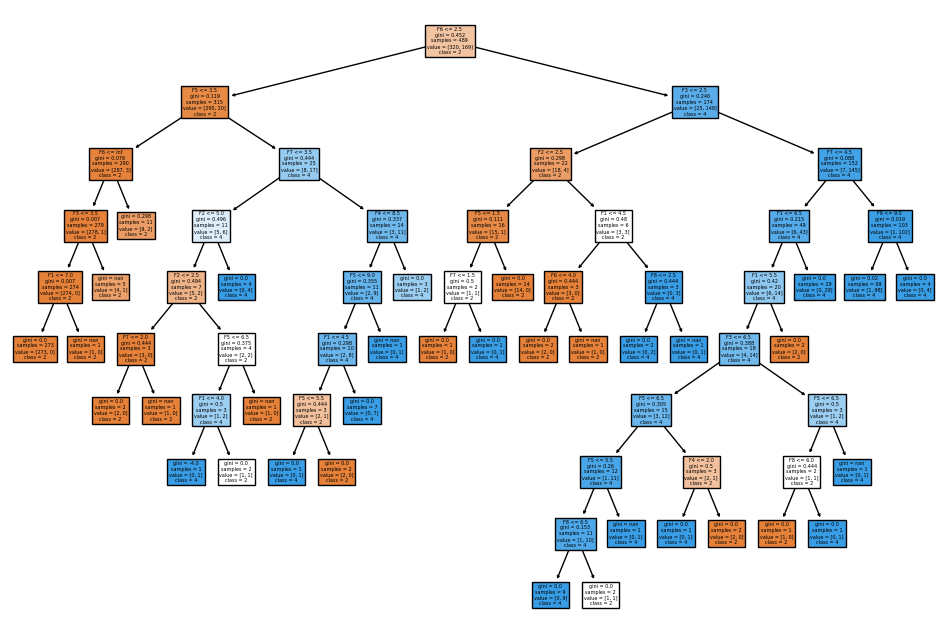

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=df.columns.to_list(), class_names=["2", "4"])
plt.show()